Failed to get ticker 'PTR4.SA' reason: Expecting value: line 1 column 1 (char 0)

1 Failed download:
['PTR4.SA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Empty DataFrame
Columns: [PTR4.SA]
Index: []


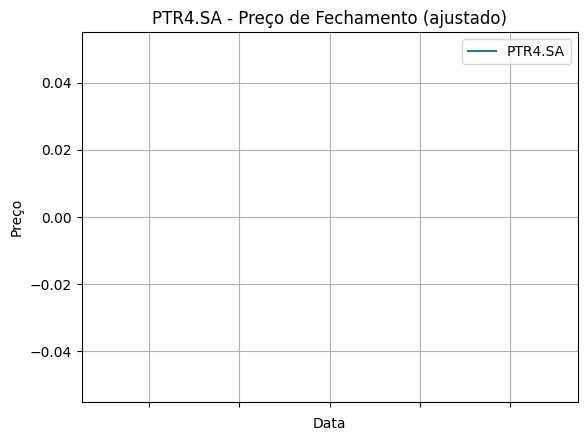

In [2]:
import yfinance as yf
import pandas as pd

# arquivo: fetch_close_prices.py
# Uso: este arquivo pode ser executado em um Jupyter cell ou como script Python.
import matplotlib.pyplot as plt

def fetch_close(symbols, start, end, adjusted=True):
    """
    Retorna DataFrame com preços de fechamento (ajustados por padrão).
    symbols: str ou lista de str (tickers)
    start, end: strings 'YYYY-MM-DD' ou objetos datetime
    adjusted: True -> 'Adj Close', False -> 'Close'
    """
    if isinstance(symbols, str):
        symbols = [symbols]

    df = yf.download(symbols, start=start, end=end, progress=False)
    col = "Adj Close" if adjusted else "Close"

    if col not in df.columns:
        raise ValueError(f"Coluna {col} não encontrada nos dados retornados.")

    close = df[col]
    # Garantir DataFrame mesmo para um ticker
    if isinstance(close, pd.Series):
        close = close.to_frame(name=symbols[0])
    return close

if __name__ == "__main__":
    # Exemplo: DIS de 2018-01-01 até 2024-07-20
    symbol = "PTR4.SA"
    start_date = "2018-01-01"
    end_date = "2024-07-20"

    df_close = fetch_close(symbol, start_date, end_date, adjusted=True)
    print(df_close.tail())

    # Salvar em CSV
    df_close.to_csv(f"close_prices_{symbol}.csv")

    # Plot rápido
    df_close.plot(title=f"{symbol} - Preço de Fechamento (ajustado)")
    plt.xlabel("Data")
    plt.ylabel("Preço")
    plt.grid(True)
    plt.show()